# importing libraries 

In [2]:
from multiprocessing import Lock, Process, Queue, current_process
import time
import queue # imported for using queue.Empty exception


def do_job(tasks_to_accomplish, tasks_that_are_done):
    while True:
        try:
            '''
                try to get task from the queue. get_nowait() function will 
                raise queue.Empty exception if the queue is empty. 
                queue(False) function would do the same task also.
            '''
            task = tasks_to_accomplish.get_nowait()
        except queue.Empty:

            break
        else:
            '''
                if no exception has been raised, add the task completion 
                message to task_that_are_done queue
            '''
            print(task)
            tasks_that_are_done.put(task + ' is done by ' + current_process().name)
            time.sleep(.5)
    return True


def main():
    number_of_task = 10
    number_of_processes = 4
    tasks_to_accomplish = Queue()
    tasks_that_are_done = Queue()
    processes = []

    for i in range(number_of_task):
        tasks_to_accomplish.put("Task no " + str(i))

    # creating processes
    for w in range(number_of_processes):
        p = Process(target=do_job, args=(tasks_to_accomplish, tasks_that_are_done))
        processes.append(p)
        p.start()

    # completing process
    for p in processes:
        p.join()

    # print the output
    while not tasks_that_are_done.empty():
        print(tasks_that_are_done.get())

    return True


if __name__ == '__main__':
    main()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

# Data_Wrangling

In [4]:
data = pd.read_csv(r"E:\NYC_Taxi_Trips\taxi_trips\2017_taxi_trips.csv" )

In [ ]:
data.to_csv("E:/NYC_Taxi_Trips/taxi_trips/cleaned_2017_taxi_trips.csv" )

# Data_Inspection

In [5]:
data.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,1,2017-01-01 09:00:01.000,2017-01-01 09:03:56.000,N,1,74,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00
1,1,2017-01-01 18:57:55.000,2017-01-01 19:01:16.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00
2,2,2017-01-02 06:55:47.000,2017-01-02 06:58:54.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00
3,2,2017-01-02 14:34:17.000,2017-01-02 14:39:29.000,N,1,74,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00
4,1,2017-01-03 06:12:30.000,2017-01-03 06:15:56.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00
5,2,2017-01-03 10:52:24.000,2017-01-03 10:56:35.000,N,1,41,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00
6,2,2017-01-03 10:56:13.000,2017-01-03 11:00:24.000,N,1,75,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00
7,1,2017-01-05 12:32:51.000,2017-01-05 12:37:11.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00
8,1,2017-01-05 14:23:16.000,2017-01-05 14:27:18.000,N,1,152,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00
9,2,2017-01-06 07:39:25.000,2017-01-06 07:44:19.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,2,1.00


In [6]:
data.describe()
#getting arithmetic calculations of the datasets ( numeric values only ) , and as we see there is minus values i will inspect it
#and see the reason of it

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740667.00,11740640.00
mean,1.80,1.08,111.90,129.06,1.36,2.68,11.80,0.35,0.49,1.15,0.10,0.29,14.24,1.51,1.02
std,0.40,0.56,75.88,77.23,1.04,2.83,9.88,0.39,0.08,2.17,2.66,0.05,11.51,0.52,0.13
min,1.00,1.00,1.00,1.00,0.00,0.00,-480.00,-4.50,-0.50,-101.00,-80.00,-0.30,-480.00,1.00,1.00
25%,2.00,1.00,49.00,61.00,1.00,1.00,6.00,0.00,0.50,0.00,0.00,0.30,7.80,1.00,1.00
50%,2.00,1.00,82.00,129.00,1.00,1.75,9.00,0.50,0.50,0.00,0.00,0.30,11.15,1.00,1.00
75%,2.00,1.00,166.00,193.00,1.00,3.30,14.50,0.50,0.50,1.95,0.00,0.30,16.94,2.00,1.00
max,2.00,99.00,265.00,265.00,9.00,640.00,6003.50,30.00,0.83,449.56,7999.92,0.30,8999.91,5.00,2.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740667 entries, 0 to 11740666
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        int64  
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           int64  
 17  trip_type              float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.6+ GB


In [8]:
len(data)
# total rows are more than 11 million 

11740667

In [9]:
data.size

211332006

In [10]:
data.shape
# how many rows and columns in the dataset ( more than 11.5 million rows)

(11740667, 18)

In [11]:
data.count(0)
#counting the column not null values , if i want to count the rows i will replace (0) with (1)

VendorID                 11740667
lpep_pickup_datetime     11740667
lpep_dropoff_datetime    11740667
store_and_fwd_flag       11740667
RatecodeID               11740667
PULocationID             11740667
DOLocationID             11740667
passenger_count          11740667
trip_distance            11740667
fare_amount              11740667
extra                    11740667
mta_tax                  11740667
tip_amount               11740667
tolls_amount             11740667
improvement_surcharge    11740667
total_amount             11740667
payment_type             11740667
trip_type                11740640
dtype: int64

In [12]:
data.columns
# names of columns 

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [13]:
data.trip_type.unique() #check all columns symetric values or not 

array([ 1.,  2., nan])

### replacing values of specific columns to be well expresed

In [14]:
data.trip_type.replace(to_replace = [1,2],value=["Street-hail","Dispatch"],inplace= True) #trip_type column

In [15]:
data.trip_type.unique()

array(['Street-hail', 'Dispatch', nan], dtype=object)

In [16]:
data.payment_type.replace(to_replace = [1,2,3,4,5,6],value=["Creditcard","Cash","Nocharge","Dispute","Unknown","Voidedtrip"],inplace= True) #payment_type column

In [17]:
data.payment_type.unique()

array(['Cash', 'Creditcard', 'Nocharge', 'Dispute', 'Unknown'],
      dtype=object)

In [18]:
data.trip_type.replace(to_replace = [1,2],value=["Street-hail","Dispatch"],inplace= True)

In [19]:
data.trip_type.unique()

array(['Street-hail', 'Dispatch', nan], dtype=object)

### getting the null value counts in the colunmns

In [20]:
data.isnull().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                27
dtype: int64

### showing the duplicated rows in dataset

In [21]:
data[data.duplicated()]
# as we see it is 44 rows duplicated 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
1229795,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail
1229796,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail
1229797,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail
1229798,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail
1229799,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail
1229800,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail
1229801,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail
1229802,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail
1229803,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail
1229804,2,2017-06-29 17:01:37.000,2017-06-29 17:02:59.000,N,1,264,264,1,0.00,1.10,0.00,0.50,0.00,0.00,0.30,1.90,Cash,Street-hail


# Data_Cleaning

## renaming columns 

In [22]:
data.rename(columns = {"lpep_pickup_datetime": "pickup_datetime", "lpep_dropoff_datetime": "dropoff_datetime"},inplace = True)
# renaming the columns (lpep_pickup_datetime & lpep_dropoff_datetime) as its very long 

## creating new columns 

In [23]:
data['pickup_Date'] = pd.to_datetime(data['pickup_datetime']).dt.date # creating new column to show me the dates of the pickup
data['pickup_Time'] = pd.to_datetime(data['pickup_datetime']).dt.time # creating new column to show me the time of the pickup
data['pickup_month'] = pd.to_datetime(data['pickup_Date']).dt.month # creating new column to show me the month of the pickup

In [24]:
data['dropoff_Date'] = pd.to_datetime(data['dropoff_datetime']).dt.date # creating new column to show me the dates of the dropoff
data['dropoff_Time'] = pd.to_datetime(data['dropoff_datetime']).dt.time # creating new column to show me the time of the dropoff

In [25]:
data["trip_time_days"]=(data["dropoff_Date"]-data["pickup_Date"]).dt.days

## removing duplicates

In [26]:
data.drop_duplicates(inplace=True)
#bye bye

## lets check again

In [27]:

data[data.duplicated()].count()
# no duplicates

VendorID                 0
pickup_datetime          0
dropoff_datetime         0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
pickup_Date              0
pickup_Time              0
pickup_month             0
dropoff_Date             0
dropoff_Time             0
trip_time_days           0
dtype: int64

In [28]:
data.head(10)
#show data again

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_Date,pickup_Time,pickup_month,dropoff_Date,dropoff_Time,trip_time_days
0,1,2017-01-01 09:00:01.000,2017-01-01 09:03:56.000,N,1,74,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-01,09:00:01,1,2017-01-01,09:03:56,0
1,1,2017-01-01 18:57:55.000,2017-01-01 19:01:16.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-01,18:57:55,1,2017-01-01,19:01:16,0
2,2,2017-01-02 06:55:47.000,2017-01-02 06:58:54.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-02,06:55:47,1,2017-01-02,06:58:54,0
3,2,2017-01-02 14:34:17.000,2017-01-02 14:39:29.000,N,1,74,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-02,14:34:17,1,2017-01-02,14:39:29,0
4,1,2017-01-03 06:12:30.000,2017-01-03 06:15:56.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-03,06:12:30,1,2017-01-03,06:15:56,0
5,2,2017-01-03 10:52:24.000,2017-01-03 10:56:35.000,N,1,41,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-03,10:52:24,1,2017-01-03,10:56:35,0
6,2,2017-01-03 10:56:13.000,2017-01-03 11:00:24.000,N,1,75,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-03,10:56:13,1,2017-01-03,11:00:24,0
7,1,2017-01-05 12:32:51.000,2017-01-05 12:37:11.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-05,12:32:51,1,2017-01-05,12:37:11,0
8,1,2017-01-05 14:23:16.000,2017-01-05 14:27:18.000,N,1,152,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-05,14:23:16,1,2017-01-05,14:27:18,0
9,2,2017-01-06 07:39:25.000,2017-01-06 07:44:19.000,N,1,42,41,1,0.70,5.00,0.00,0.50,0.00,0.00,0.30,5.80,Cash,Street-hail,2017-01-06,07:39:25,1,2017-01-06,07:44:19,0


In [29]:
#data["total_trip_time_hours"] = (data["dropoff_Time"]-data["pickup_Time"])

In [30]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_month,trip_time_days
count,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00
mean,1.80,1.08,111.90,129.06,1.36,2.68,11.80,0.35,0.49,1.15,0.10,0.29,14.24,6.23,0.01
std,0.40,0.56,75.88,77.23,1.04,2.83,9.88,0.39,0.08,2.17,2.66,0.05,11.51,3.45,0.12
min,1.00,1.00,1.00,1.00,0.00,0.00,-480.00,-4.50,-0.50,-101.00,-80.00,-0.30,-480.00,1.00,-2.00
25%,2.00,1.00,49.00,61.00,1.00,1.00,6.00,0.00,0.50,0.00,0.00,0.30,7.80,3.00,0.00
50%,2.00,1.00,82.00,129.00,1.00,1.75,9.00,0.50,0.50,0.00,0.00,0.30,11.15,6.00,0.00
75%,2.00,1.00,166.00,193.00,1.00,3.30,14.50,0.50,0.50,1.95,0.00,0.30,16.94,9.00,0.00
max,2.00,99.00,265.00,265.00,9.00,640.00,6003.50,30.00,0.83,449.56,7999.92,0.30,8999.91,12.00,2.00


In [31]:
trip_timelenght_morethan_0_days = data.loc[(data['trip_time_days']!=0) & (data['total_amount']!= 16.94)]
#get the trips more than 0 days 

In [32]:
#trip_timelenght_morethan_0_days.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/NYC_TAXI_ANALYSIS/trip_timelenght_morethan_0_days.csv")
#export these data into csv to inspect

In [33]:
trip_amount_lowerthan_and_equlato_0 = data.loc[(data['total_amount']<=0) ]

In [34]:
#trip_amount_lowerthan_and_equlato_0.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/NYC_TAXI_ANALYSIS/trip_amount_lowerthan_and_equlato_0.csv")
#export these data into csv to inspect

In [35]:
#data.drop(data.loc[data['trip_time_days']!=0].index, inplace=True)
# here i dropped the rows which contains "trip time " lower or bigger than 1 day as it does not make a sense 
#firstly get these data to show the reason to be like this

In [36]:
data.nlargest(5, "tip_amount")

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_Date,pickup_Time,pickup_month,dropoff_Date,dropoff_Time,trip_time_days
7535501,1,2017-09-11 16:27:18.000,2017-09-11 17:20:32.000,N,1,75,121,1,12.00,41.00,1.00,0.50,449.56,5.76,0.30,498.12,Creditcard,Street-hail,2017-09-11,16:27:18,9,2017-09-11,17:20:32,0
10507181,2,2017-08-26 00:48:47.000,2017-08-26 01:07:17.000,N,1,255,211,1,5.21,18.50,0.50,0.50,446.79,0.00,0.30,466.59,Creditcard,Street-hail,2017-08-26,00:48:47,8,2017-08-26,01:07:17,0
5175790,2,2017-05-26 09:24:17.000,2017-05-26 09:26:38.000,N,1,33,33,1,0.00,2.50,0.00,0.50,408.00,0.00,0.30,411.30,Creditcard,Street-hail,2017-05-26,09:24:17,5,2017-05-26,09:26:38,0
3036247,2,2017-04-10 15:08:54.000,2017-04-10 15:27:57.000,N,1,95,129,1,2.89,13.50,0.00,0.50,400.00,0.00,0.30,414.30,Creditcard,Street-hail,2017-04-10,15:08:54,4,2017-04-10,15:27:57,0
4912237,2,2017-05-17 18:48:19.000,2017-05-17 18:56:38.000,N,1,66,66,1,0.01,6.00,1.00,0.50,400.00,0.00,0.30,407.80,Creditcard,Street-hail,2017-05-17,18:48:19,5,2017-05-17,18:56:38,0


In [37]:
data.loc[data['fare_amount'] ==  6003.50]


,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_Date,pickup_Time,pickup_month,dropoff_Date,dropoff_Time,trip_time_days
8777562,1,2017-11-18 15:50:54.000,2017-11-18 15:53:15.000,N,1,82,82,1,0.30,6003.50,0.00,0.50,0.00,0.00,0.30,6004.30,Cash,Street-hail,2017-11-18,15:50:54,11,2017-11-18,15:53:15,0


In [38]:
data["trip_type"].value_counts()

Street-hail    11524498
Dispatch         216098
Name: trip_type, dtype: int64

In [39]:
data["VendorID"].value_counts()

2    9447258
1    2293365
Name: VendorID, dtype: int64

In [40]:
data[data["store_and_fwd_flag"].isin(["Y"])]

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_Date,pickup_Time,pickup_month,dropoff_Date,dropoff_Time,trip_time_days
201016,1,2017-01-01 12:52:07.000,2017-01-01 13:00:06.000,Y,1,42,41,1,1.40,8.00,0.00,0.50,0.00,0.00,0.30,8.80,Cash,Street-hail,2017-01-01,12:52:07,1,2017-01-01,13:00:06,0
201017,1,2017-01-01 12:13:10.000,2017-01-01 12:25:52.000,Y,1,65,79,1,3.10,12.50,0.00,0.50,0.00,0.00,0.30,13.30,Cash,Street-hail,2017-01-01,12:13:10,1,2017-01-01,12:25:52,0
201018,1,2017-01-01 13:50:16.000,2017-01-01 13:56:07.000,Y,1,210,150,1,1.60,7.00,0.00,0.50,0.00,0.00,0.30,7.80,Cash,Street-hail,2017-01-01,13:50:16,1,2017-01-01,13:56:07,0
201019,1,2017-01-01 13:16:33.000,2017-01-01 13:31:29.000,Y,1,17,256,1,3.40,13.00,0.00,0.50,0.00,0.00,0.30,13.80,Cash,Street-hail,2017-01-01,13:16:33,1,2017-01-01,13:31:29,0
201020,1,2017-01-01 13:41:43.000,2017-01-01 13:46:31.000,Y,1,75,236,1,1.20,6.00,0.00,0.50,0.00,0.00,0.30,6.80,Cash,Street-hail,2017-01-01,13:41:43,1,2017-01-01,13:46:31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11735902,1,2017-11-03 11:44:08.000,2017-11-03 12:14:33.000,Y,1,145,161,1,3.20,20.00,0.00,0.50,5.30,5.76,0.30,31.86,Creditcard,Street-hail,2017-11-03,11:44:08,11,2017-11-03,12:14:33,0
11736144,1,2017-10-28 11:43:22.000,2017-10-28 12:02:34.000,Y,1,145,107,1,3.00,13.50,0.00,0.50,2.00,5.76,0.30,22.06,Creditcard,Street-hail,2017-10-28,11:43:22,10,2017-10-28,12:02:34,0
11737013,1,2017-11-06 07:01:09.000,2017-11-06 07:23:16.000,Y,1,41,138,1,6.90,24.00,0.00,0.50,4.00,5.76,0.30,34.56,Creditcard,Street-hail,2017-11-06,07:01:09,11,2017-11-06,07:23:16,0
11739585,1,2017-11-02 18:03:57.000,2017-11-02 18:24:17.000,Y,1,166,200,1,7.50,23.00,1.00,0.50,0.00,2.64,0.30,27.44,Cash,Street-hail,2017-11-02,18:03:57,11,2017-11-02,18:24:17,0


In [41]:
data["store_and_fwd_flag"].value_counts(normalize = True)*100

N   99.85
Y    0.15
Name: store_and_fwd_flag, dtype: float64

In [42]:
passenger_in_trip = data["passenger_count"].value_counts(normalize = True)

In [43]:
passenger_in_trip*100

1   84.22
2    8.00
5    3.55
3    1.88
6    1.73
4    0.61
0    0.02
8    0.00
7    0.00
9    0.00
Name: passenger_count, dtype: float64

In [44]:
data["payment_type"].value_counts(normalize = True)*100

Creditcard   50.38
Cash         48.90
Nocharge      0.46
Dispute       0.26
Unknown       0.00
Name: payment_type, dtype: float64

In [45]:
data["total_amount"].describe()

count   11740623.00
mean          14.24
std           11.51
min         -480.00
25%            7.80
50%           11.15
75%           16.94
max         8999.91
Name: total_amount, dtype: float64

In [46]:
total_amount_less_than_zero = data[data["total_amount"]<0]

In [47]:
data[data["total_amount"]<0]["payment_type"].value_counts()

Nocharge      18114
Dispute        7971
Cash            548
Creditcard        6
Name: payment_type, dtype: int64

In [48]:
passenger_count = data[["passenger_count"]].value_counts()

In [49]:
#total_amount_less_than_zero.to_csv("E:/total_amount_less_than_zero.csv")

In [50]:
not_mentioned_ratecodeid = data[data["RatecodeID"]==99]
#not_mentioned_ratecodeid.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/NYC_TAXI_ANALYSIS/not_mentioned_ratecodeid.csv")

In [51]:
import seaborn as sns 

In [52]:
data.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_month,trip_time_days
VendorID,1.00,-0.00,0.01,0.00,0.09,0.01,0.02,-0.01,-0.01,0.00,0.00,-0.01,0.02,0.02,0.03
RatecodeID,-0.00,1.00,0.05,0.02,-0.00,0.06,0.13,-0.11,-0.75,0.01,0.02,-0.74,0.11,-0.01,0.00
PULocationID,0.01,0.05,1.00,0.14,0.02,0.05,0.05,0.02,-0.05,0.03,0.00,-0.05,0.05,-0.01,0.01
DOLocationID,0.00,0.02,0.14,1.00,0.01,0.09,0.09,-0.02,-0.01,0.06,0.01,-0.01,0.09,0.00,0.00
passenger_count,0.09,-0.00,0.02,0.01,1.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00
trip_distance,0.01,0.06,0.05,0.09,0.01,1.00,0.83,-0.03,-0.01,0.39,0.10,0.00,0.81,0.02,0.06
fare_amount,0.02,0.13,0.05,0.09,0.01,0.83,1.00,-0.03,-0.04,0.36,0.11,-0.03,0.95,0.03,0.05
extra,-0.01,-0.11,0.02,-0.02,0.01,-0.03,-0.03,1.00,0.15,0.02,-0.00,0.15,0.01,-0.02,0.03
mta_tax,-0.01,-0.75,-0.05,-0.01,0.00,-0.01,-0.04,0.15,1.00,0.02,-0.01,0.98,-0.02,0.00,-0.00
tip_amount,0.00,0.01,0.03,0.06,0.01,0.39,0.36,0.02,0.02,1.00,0.06,0.03,0.52,-0.01,0.01


<AxesSubplot:>

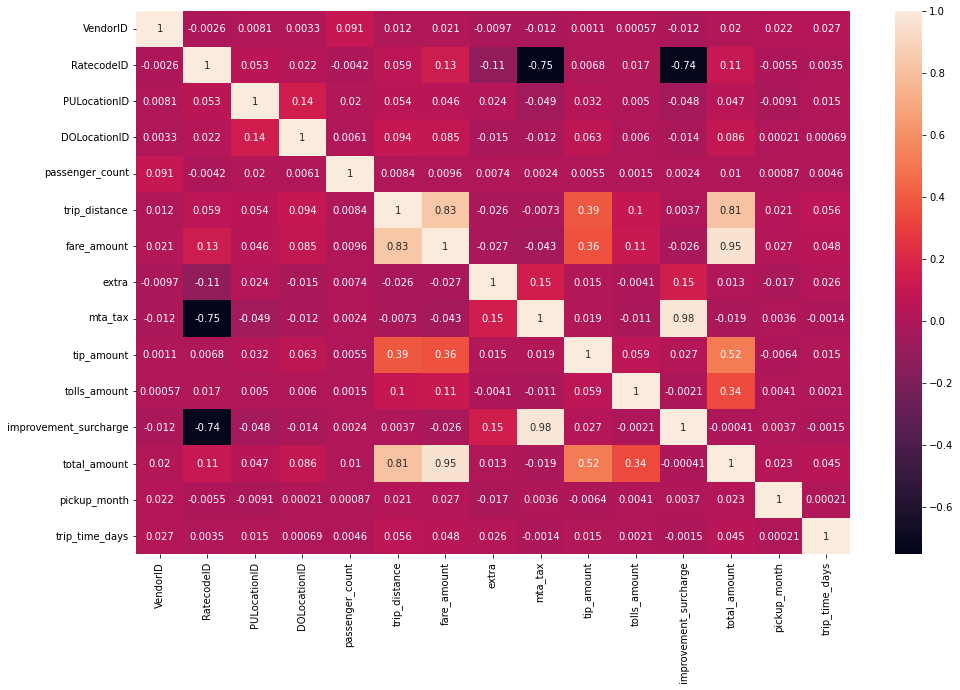

In [53]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),annot=True)


In [54]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_month,trip_time_days
count,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00,11740623.00
mean,1.80,1.08,111.90,129.06,1.36,2.68,11.80,0.35,0.49,1.15,0.10,0.29,14.24,6.23,0.01
std,0.40,0.56,75.88,77.23,1.04,2.83,9.88,0.39,0.08,2.17,2.66,0.05,11.51,3.45,0.12
min,1.00,1.00,1.00,1.00,0.00,0.00,-480.00,-4.50,-0.50,-101.00,-80.00,-0.30,-480.00,1.00,-2.00
25%,2.00,1.00,49.00,61.00,1.00,1.00,6.00,0.00,0.50,0.00,0.00,0.30,7.80,3.00,0.00
50%,2.00,1.00,82.00,129.00,1.00,1.75,9.00,0.50,0.50,0.00,0.00,0.30,11.15,6.00,0.00
75%,2.00,1.00,166.00,193.00,1.00,3.30,14.50,0.50,0.50,1.95,0.00,0.30,16.94,9.00,0.00
max,2.00,99.00,265.00,265.00,9.00,640.00,6003.50,30.00,0.83,449.56,7999.92,0.30,8999.91,12.00,2.00


## plotting outliers

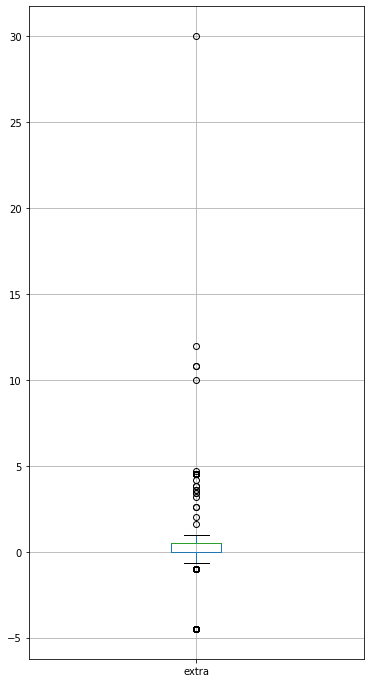

In [62]:
plt.figure(figsize = (6,12))
data.boxplot("extra")
plt.show()

In [64]:
data[data["extra"]>5]

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_Date,pickup_Time,pickup_month,dropoff_Date,dropoff_Time,trip_time_days
5874689,2,2017-06-20 02:18:48.000,2017-06-20 02:29:08.000,N,1,264,264,1,0.00,4.50,10.00,0.00,0.00,0.00,0.00,14.50,Cash,Street-hail,2017-06-20,02:18:48,6,2017-06-20,02:29:08,0
5874690,2,2017-06-20 02:54:18.000,2017-06-20 02:58:17.000,N,1,264,264,1,0.00,2.00,12.00,0.00,0.00,0.00,0.00,14.00,Cash,Street-hail,2017-06-20,02:54:18,6,2017-06-20,02:58:17,0
6118483,2,2017-06-20 02:40:05.000,2017-06-20 02:43:49.000,N,1,264,264,1,0.00,2.00,10.80,0.00,3.20,0.00,0.00,16.00,Creditcard,Street-hail,2017-06-20,02:40:05,6,2017-06-20,02:43:49,0
10062816,2,2017-08-18 13:59:55.000,2017-08-18 14:00:20.000,N,1,264,264,1,0.00,1.50,10.80,0.00,0.00,0.00,0.00,12.30,Cash,Street-hail,2017-08-18,13:59:55,8,2017-08-18,14:00:20,0
11189674,1,2017-11-07 19:44:55.000,2017-11-07 19:47:09.000,N,1,56,56,1,0.30,3.50,30.00,0.50,0.00,0.00,0.30,34.30,Cash,Street-hail,2017-11-07,19:44:55,11,2017-11-07,19:47:09,0


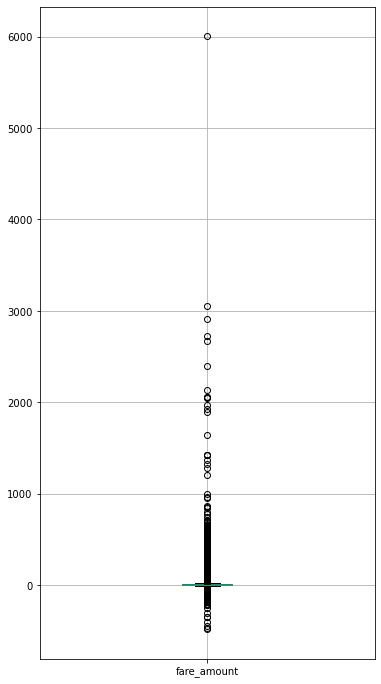

In [69]:
plt.figure(figsize = (6,12))
data.boxplot("fare_amount")
plt.show()

In [67]:
data[data["fare_amount"]<0]

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_Date,pickup_Time,pickup_month,dropoff_Date,dropoff_Time,trip_time_days
489068,2,2017-01-01 14:00:12.000,2017-01-01 14:00:47.000,N,1,41,41,1,0.05,-2.50,0.00,-0.50,0.00,0.00,-0.30,-3.30,Nocharge,Street-hail,2017-01-01,14:00:12,1,2017-01-01,14:00:47,0
489069,2,2017-01-02 08:05:10.000,2017-01-02 08:05:10.000,N,1,159,159,1,0.04,-2.50,0.00,-0.50,0.00,0.00,-0.30,-3.30,Nocharge,Street-hail,2017-01-02,08:05:10,1,2017-01-02,08:05:10,0
489070,2,2017-01-02 13:46:50.000,2017-01-02 13:47:44.000,N,1,130,130,1,0.03,-2.50,0.00,-0.50,0.00,0.00,-0.30,-3.30,Nocharge,Street-hail,2017-01-02,13:46:50,1,2017-01-02,13:47:44,0
489071,2,2017-01-02 18:13:09.000,2017-01-02 18:13:38.000,N,1,130,130,1,0.03,-2.50,0.00,-0.50,0.00,0.00,-0.30,-3.30,Nocharge,Street-hail,2017-01-02,18:13:09,1,2017-01-02,18:13:38,0
489072,2,2017-01-03 10:40:31.000,2017-01-03 10:40:58.000,N,1,116,42,1,0.02,-2.50,0.00,-0.50,0.00,0.00,-0.30,-3.30,Nocharge,Street-hail,2017-01-03,10:40:31,1,2017-01-03,10:40:58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11363106,2,2017-11-10 21:45:02.000,2017-11-10 21:47:07.000,N,1,65,65,1,0.00,-3.50,-0.50,-0.50,-0.96,0.00,-0.30,-7.71,Nocharge,Street-hail,2017-11-10,21:45:02,11,2017-11-10,21:47:07,0
11363109,2,2017-11-13 10:01:08.000,2017-11-13 10:04:12.000,N,1,25,33,1,0.57,-4.00,0.00,-0.50,-1.20,0.00,-0.30,-6.00,Nocharge,Street-hail,2017-11-13,10:01:08,11,2017-11-13,10:04:12,0
11363112,2,2017-11-18 00:47:03.000,2017-11-18 00:47:17.000,N,1,80,80,1,0.00,-2.50,-0.50,-0.50,-5.00,0.00,-0.30,-8.80,Dispute,Street-hail,2017-11-18,00:47:03,11,2017-11-18,00:47:17,0
11739237,2,2017-10-27 21:01:30.000,2017-10-27 21:02:56.000,N,1,17,49,1,0.53,-3.50,-0.50,-0.50,0.00,-2.16,-0.30,-6.96,Dispute,Street-hail,2017-10-27,21:01:30,10,2017-10-27,21:02:56,0


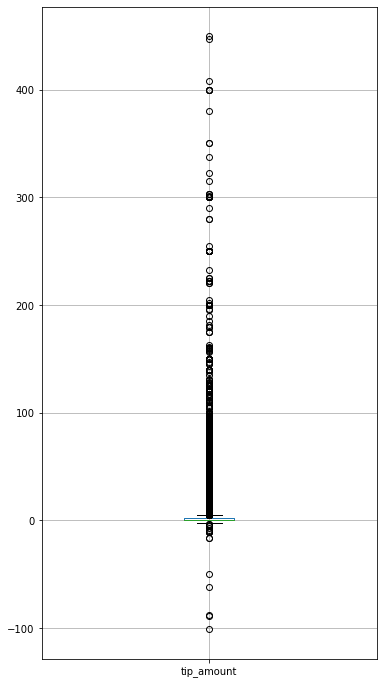

In [70]:
plt.figure(figsize = (6,12))
data.boxplot("tip_amount")
plt.show()

In [72]:
data[data["tip_amount"]>300]

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_Date,pickup_Time,pickup_month,dropoff_Date,dropoff_Time,trip_time_days
857625,2,2017-01-29 03:24:55.000,2017-01-29 03:46:56.000,N,1,255,229,1,6.20,21.50,0.50,0.50,303.00,0.00,0.30,325.80,Creditcard,Street-hail,2017-01-29,03:24:55,1,2017-01-29,03:46:56,0
1818416,2,2017-07-02 22:43:05.000,2017-07-02 23:05:57.000,N,1,66,48,1,5.95,21.00,0.50,0.50,337.30,0.00,0.30,359.60,Creditcard,Street-hail,2017-07-02,22:43:05,7,2017-07-02,23:05:57,0
1907378,2,2017-07-02 21:16:52.000,2017-07-02 21:38:49.000,N,1,255,170,1,4.79,18.50,0.50,0.50,322.29,0.00,0.30,342.09,Creditcard,Street-hail,2017-07-02,21:16:52,7,2017-07-02,21:38:49,0
3036247,2,2017-04-10 15:08:54.000,2017-04-10 15:27:57.000,N,1,95,129,1,2.89,13.50,0.00,0.50,400.00,0.00,0.30,414.30,Creditcard,Street-hail,2017-04-10,15:08:54,4,2017-04-10,15:27:57,0
3041220,2,2017-04-22 14:57:46.000,2017-04-22 16:26:10.000,N,1,49,225,1,9.40,54.00,0.00,0.50,300.80,0.00,0.30,355.60,Creditcard,Street-hail,2017-04-22,14:57:46,4,2017-04-22,16:26:10,0
4067400,2,2017-02-18 15:53:43.000,2017-02-18 16:24:53.000,N,1,130,36,1,9.41,31.50,0.00,0.50,303.00,0.00,0.30,335.30,Creditcard,Street-hail,2017-02-18,15:53:43,2,2017-02-18,16:24:53,0
4896534,2,2017-05-01 16:34:26.000,2017-05-01 17:13:14.000,N,1,66,142,1,7.18,30.50,1.00,0.50,315.00,0.00,0.30,347.30,Creditcard,Street-hail,2017-05-01,16:34:26,5,2017-05-01,17:13:14,0
4912237,2,2017-05-17 18:48:19.000,2017-05-17 18:56:38.000,N,1,66,66,1,0.01,6.00,1.00,0.50,400.00,0.00,0.30,407.80,Creditcard,Street-hail,2017-05-17,18:48:19,5,2017-05-17,18:56:38,0
5175658,2,2017-05-13 14:42:32.000,2017-05-13 14:42:34.000,N,1,33,33,1,0.00,2.50,0.00,0.50,400.00,0.00,0.30,403.30,Creditcard,Street-hail,2017-05-13,14:42:32,5,2017-05-13,14:42:34,0
5175790,2,2017-05-26 09:24:17.000,2017-05-26 09:26:38.000,N,1,33,33,1,0.00,2.50,0.00,0.50,408.00,0.00,0.30,411.30,Creditcard,Street-hail,2017-05-26,09:24:17,5,2017-05-26,09:26:38,0


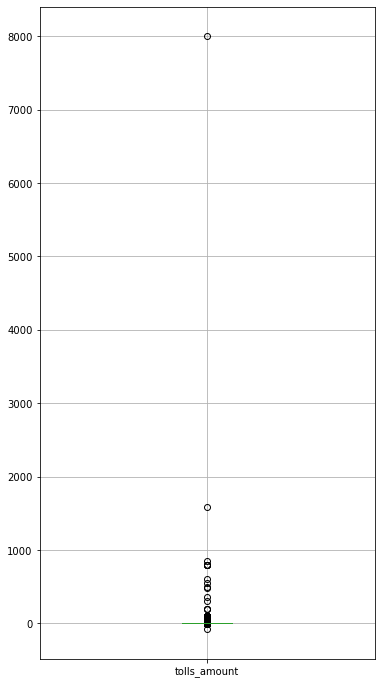

In [73]:
plt.figure(figsize = (6,12))
data.boxplot("tolls_amount")
plt.show()

In [77]:
data[data["tolls_amount"]==7999.92]

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_Date,pickup_Time,pickup_month,dropoff_Date,dropoff_Time,trip_time_days
8593713,1,2017-03-28 15:32:05.000,2017-03-28 15:34:40.000,N,5,199,199,1,0.00,999.99,0.00,0.00,0.00,7999.92,0.00,8999.91,Cash,Dispatch,2017-03-28,15:32:05,3,2017-03-28,15:34:40,0
